# Signal Flow During a MEG Recording

## Purpose of the Experiment

In a MEG (magnetoencephalography) experiment, the goal is to **present stimuli (visual and/or auditory)** to a participant, **record behavioral responses** (button presses), and most importantly, **acquire MEG signals with precise synchronization** to experimental events.  
This requires **precise software control**, **rigorous hardware connections**, and **multiple cross-checks** to ensure data quality.

---

## Main Components and Their Roles

| Component                 | Role                                                                                                                | Signal Type            |
|--------------------------|---------------------------------------------------------------------------------------------------------------------|------------------------|
| **Stim PC**              | Presents stimuli (via Python code), generates digital triggers, receives button responses                           | Digital (TTL), DVI     |
| **MEG PC**               | Acquires MEG, MISC, and STI signals                                                                                  | Analog & Digital       |
| **STI 101/102**          | Bidirectional digital relays (mirrors) between PCs and peripherals                                                   | Digital (TTL)          |
| **MISC (Analog)**        | Captures actual analog signals (e.g., audio or visual) for verification                                              | Analog                 |
| **fORP**                 | Interface between fiber-optic response boxes and digital systems (TTL)                                               | Fiber Optic → TTL      |
| **Response Boxes**       | Allow participant to respond (buttons)                                                                               | Fiber Optic            |
| **Audio Splitter**       | Distributes audio/trigger signal to multiple outputs                                                                 | Analog + Digital       |
| **Preamplifier**         | Detects analog audio triggers (threshold crossing)                                                                   | Analog → TTL           |
| **Amplifier**            | Amplifies analog audio signal                                                                                        | Analog                 |
| **Screen**               | Displays visual stimuli                                                                                              | Digital (DVI-D)        |
| **Projector**            | Sends image to the screen through an optical window in the MEG room wall                                             | DVI                    |
| **Headphones (Fiber Optic)** | Delivers sound to the participant                                                                               | Digital / Optical      |
| **Photodiode**           | Measures light to verify the actual display of visual stimuli                                                        | Analog                 |

---

## Types of Information Exchanged

| Exchanged Information               | Type         | Generated by         | Read by                     |
|------------------------------------|--------------|-----------------------|-----------------------------|
| Visual Stimulus                    | DVI          | Stim PC               | Projector & Stim PC Screen |
| Auditory Stimulus                  | Digital Audio| Stim PC               | Participant's Headphones   |
| Digital Trigger (audio/visual)     | TTL          | Stim PC               | STI → MEG PC & Stim PC     |
| Analog Trigger (audio/photodiode)  | Analog       | Splitter / Photodiode | MISC → MEG PC              |
| Button Response (participant)      | Fiber Optic → TTL | Response Box → fORP | STI → MEG PC & Stim PC     |

---

## Key Concepts

- **Analog vs Digital Signals**

  An **analog signal** is a **continuous** signal that can take **an infinite number of values** within a given range. It evolves smoothly over time and is commonly used to represent real-world physical phenomena (e.g., light captured by a photodiode).

  → Example: the voltage generated by a photodiode when a white square is displayed on screen.

  A **digital signal**, by contrast, is **discrete** and can only take on **specific values**, usually two:
  - 0
  - 1

  It's used to **encode information** in binary form (e.g., event presence or absence).

  → Example: a TTL trigger sent at the onset of an auditory stimulus.

- **What is a TTL Signal?**  
  TTL stands for *Transistor-Transistor Logic*.  
  A **TTL signal** is a binary digital signal (0 or 1) commonly used for triggers.  
  - Logical 0 = 0 V  
  - Logical 1 = +5 V  

- **Generated Triggers**  
  A *trigger* is a **signal sent to mark a specific experimental event**, such as the onset of a visual or auditory stimulus. Here, we say "generated" because they are produced by the Python code running on the Stim PC at each stimulus display function call.  
  Triggers are used to **synchronize MEG recordings precisely** with the experimental protocol.

  Physically, a trigger is a **brief square pulse in TTL logic**:  
  - The signal jumps from 0 V to +5 V to indicate the event,  
  - Then quickly returns to 0 V (usually after a few milliseconds).

  This square pulse is **easy to detect**, **fast to transmit** (via DB23, DB36, BNC cables…), and allows **millisecond-level temporal precision**.

- **Integrated Triggers**  
  These are **triggers embedded directly into the stimuli**, allowing automatic detection by measurement devices like the photodiode (for visual) or audio splitter (for auditory):

  - **Visual**: A **white square** is briefly displayed in the bottom-left corner of the screen at each stimulus onset. This square is detected by a **photodiode** attached to the screen, which generates a light-dependent electrical signal, read by the **MISC** box to **measure the true moment of visual presentation**.

  - **Auditory**: The **second audio channel** contains a special trigger signal synchronized with each sound. These triggers are extracted, amplified by a **preamplifier**, and converted into TTL signals, then sent to **STI boxes** to **objectively detect each sound event**.

  These integrated triggers are **independent of the Python code**: they reflect **what was actually presented** and help validate or adjust the theoretical timings from the script.

- **Onset vs Real Onset**  
  - `onset` = scheduled stimulus onset (commanded by Python script)  
  - `real_onset` = actual moment the stimulus was physically presented (measured via photodiode/audio and MISC or STI)

- **Why Two STI Boxes?**  
  The system uses **two STI boxes (101 and 102)** configured as **mirrors** to enable bidirectional transmission of digital signals (TTL):  
  - **STI 101** connects to the **Stim PC** and sends generated triggers to the **MEG PC**  
  - **STI 102** receives **button press responses** via the **fORP** box and sends them back to both the **MEG PC** and the **Stim PC**

  This mirror setup allows **long-distance communication** (e.g., between the MEG room and control room) while maintaining **reliable and synchronized bidirectional signals**.  
  → Each signal entering one STI box is transmitted identically by the other, hence the **"mirror effect"**. They are in fact connected via fiber optics.

- **Why Measure Both TTL and Analog?**  
  To **verify synchronization**:
  - Analog signals (via MISC) reflect **what actually happened** (physical reality)
  - Digital signals (via STI) reflect **what was intended** (coded in Python)

---

## Wiring Diagram

*See schematic below made using EasyEDA:*

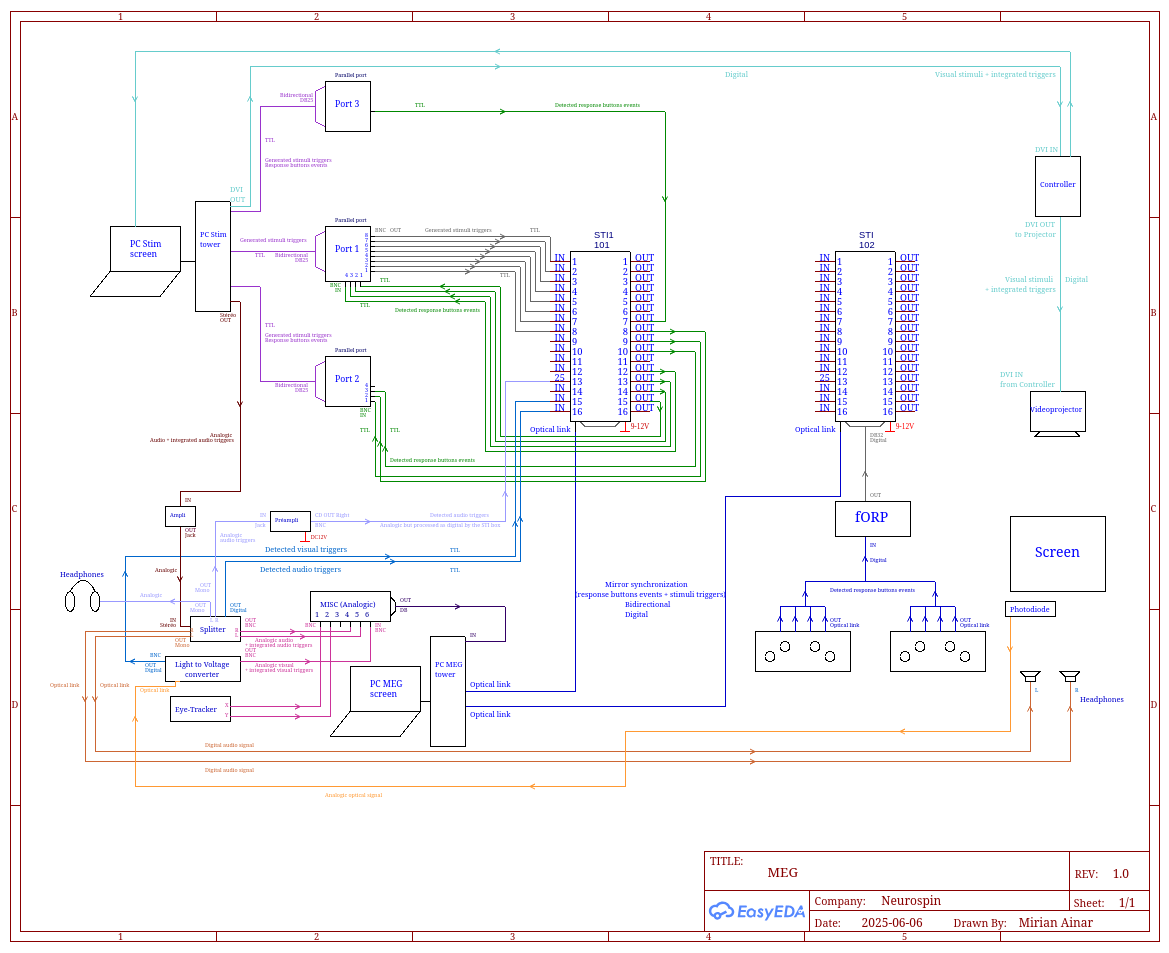

---

## Conclusion

A MEG experiment relies on a **complex but rigorously orchestrated setup** of analog and digital signals.  
Thanks to **multiple measurement points** (Python code, photodiode, MISC, STI…), we can ensure **millisecond-level synchronization** between MEG signals and experimental events.  
Though dense, this setup **ensures maximum data quality and reliability** in cognitive neuroimaging studies.
# Signal Flow During a MEG Acquisition

## Objective of the Experiment

During a MEG (Magnetoencephalography) experiment, the goal is to **present stimuli (visual and/or auditory)** to a participant, **collect behavioral responses** (button presses), and above all, **accurately acquire MEG signals** by synchronizing them precisely with experimental events.  
This requires **precise software control**, **rigorous hardware coordination**, and **multiple layers of verification** to ensure high data quality.

---

## Main Components and Their Role

| Component                     | Role                                                                                                   | Signal Type                |
|------------------------------|--------------------------------------------------------------------------------------------------------|----------------------------|
| **Stim PC**                  | Presents stimuli (via Python code), generates digital triggers, receives button response signals       | Digital (TTL), DVI         |
| **MEG PC**                   | Acquires MEG, MISC and STI signals                                                                     | Analog & Digital           |
| **STI 101/102**              | Bidirectional digital relay boxes (mirrored) between PCs and peripherals                              | Digital (TTL)              |
| **MISC (Analog)**            | Captures analog signals from visual/audio stimuli (for verification)                                  | Analog                     |
| **fORP**                     | Interface between optical response boxes and digital TTL systems                                      | Optical fiber → TTL        |
| **Response boxes**           | Allow participant to respond via button presses                                                       | Optical fiber              |
| **Audio splitter**           | Splits audio/trigger signal to different outputs                                                      | Analog + Digital           |
| **Preamp**                   | Detects analog audio triggers (threshold crossing)                                                    | Analog → TTL               |
| **Amplifier**                | Amplifies analog audio signal                                                                          | Analog                     |
| **Screen**                   | Displays visual stimuli                                                                                | Digital (DVI-D)            |
| **Projector**                | Projects the image onto the screen via an **optical opening** in the MEG chamber wall                | DVI                        |
| **Earphones (optical)**      | Deliver sound to the participant                                                                      | Digital/optical            |
| **Photodiode**               | Measures light to verify visual stimulus presentation                                                  | Analog                     |

---

## Types of Exchanged Information

| Information                   | Type             | Generated by              | Received by                   |
|------------------------------|------------------|---------------------------|-------------------------------|
| Visual stimulus              | DVI              | Stim PC                   | Projector & Screen (Stim PC) |
| Auditory stimulus            | Digital audio    | Stim PC                   | Participant’s earphones       |
| Digital trigger (audio/visual) | TTL            | Stim PC                   | STI → MEG PC & Stim PC        |
| Analog trigger (audio/photodiode) | Analog      | Splitter / Photodiode     | MISC → MEG PC                 |
| Button response              | Optical → TTL    | Response box → fORP       | STI → MEG PC & Stim PC        |

---

## Key Concepts

- **What is a TTL signal?**  
  TTL stands for *Transistor-Transistor Logic*.  
  A **TTL signal** is a standard binary digital signal used to transmit triggers:  
  - Logical 0 = 0 V  
  - Logical 1 = +5 V  

- **Generated triggers**  
  A *trigger* is a **signal sent to mark a specific experimental event**, such as the onset of a visual or auditory stimulus.  
  In the case of **generated triggers**, they are produced directly by the **Python code** running on the Stim PC every time a stimulus is presented.

  Physically, a trigger takes the form of a **TTL square pulse**:  
  - The signal jumps from 0 V to +5 V to mark the event,  
  - then returns to 0 V after a short duration (usually a few milliseconds).

  This square pulse is **easy to detect**, **fast to transmit** via dedicated cables (DB23, DB36, BNC...), and allows for **millisecond-level temporal accuracy**.

- **Integrated triggers**  
  These are **triggers embedded directly into the stimuli**, enabling automatic detection by hardware components such as the photodiode (for visual stimuli) or the audio splitter (for auditory stimuli):

  - **Visual**: A **white square** is briefly displayed in the bottom-left corner of the screen with each stimulus. It is detected by a **photodiode** placed on the screen, which converts the light into an analog signal (via a light-to-voltage converter), captured by the **MISC box**, and used to **precisely timestamp the actual visual onset**.

  - **Auditory**: A **second audio channel** contains a specific trigger signal synchronized with each auditory stimulus. These are extracted via the **audio splitter**, amplified and converted to TTL by the **preamp**, then sent to the **STI boxes**, allowing for **objective detection of each auditory onset**.

  These integrated triggers are **independent of the Python code**: they reflect **what was actually presented to the participant**, and are used to validate or adjust the theoretical timings.

- **Onset vs Real Onset**  
  - `onset`: the expected stimulus onset (as coded in the Python script).  
  - `real_onset`: the **actual** onset of the stimulus, as **measured** by the photodiode (for visual) or the audio signal (for auditory).

- **Why two STI boxes?**  
  The system uses **two STI boxes (101 and 102)** configured in **mirrored mode** to ensure **bidirectional TTL communication**:  
  - **STI 101** connects to the **Stim PC** and sends generated triggers to the **MEG PC**.  
  - **STI 102** receives button responses from the **fORP** and sends them back to both the **Stim PC** and the **MEG PC**.

  This mirrored setup enables long-distance communication (e.g., between the control room and MEG scanner) while ensuring **synchronized and mirrored transmission** in both directions.  
  → Each signal entering one box exits identically from the other—hence the name **"mirrored configuration"**. The boxes are linked by **optical fiber**.

- **Why both TTL and analog measurements?**  
  To **cross-check timing and synchronization**:  
  - Analog signals (via MISC) reflect what **actually happened**.  
  - TTL signals (via STI) reflect what was **intended** in the code.

---

## Wiring Diagram

*See diagram below created with EasyEDA:*

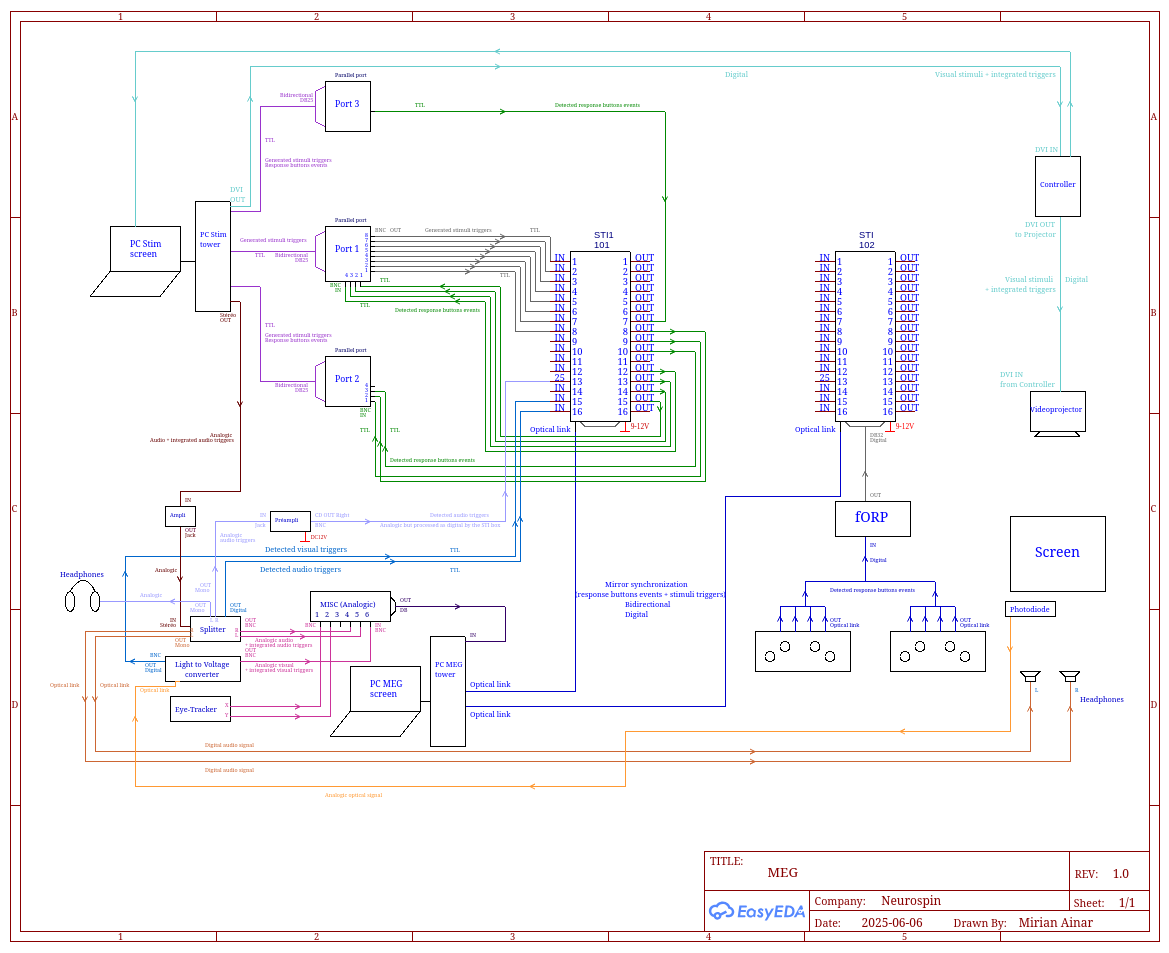

---

## Conclusion

A MEG experiment relies on a **complex yet precise orchestration** of analog and digital signals.  
By combining multiple timing sources (Python code, photodiode, MISC, STI...), the system ensures **millisecond-accurate synchronization** between brain signals and experimental events.  
Although dense, this setup guarantees **high reliability and data quality**, making it well-suited for cognitive neuroimaging studies.
